In [3]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv(
    "ts.csv",
)

<IPython.core.display.Javascript object>

In [5]:
df.dtypes

data                             object
stato                            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
note                             object
dtype: object

<IPython.core.display.Javascript object>

In [6]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
daily_positive = df[["data", "nuovi_positivi"]]

<IPython.core.display.Javascript object>

In [8]:
daily_positive = daily_positive.rename(columns={"data": "ds", "nuovi_positivi": "y"})

<IPython.core.display.Javascript object>

In [9]:
daily_positive.head()

,ds,y
0,2020-02-24T18:00:00,221
1,2020-02-25T18:00:00,93
2,2020-02-26T18:00:00,78
3,2020-02-27T18:00:00,250
4,2020-02-28T18:00:00,238


<IPython.core.display.Javascript object>

In [12]:
m = NeuralProphet(
    yearly_seasonality=True,
    daily_seasonality=False,
    weekly_seasonality=True,
    num_hidden_layers=2,
    # seasonality_reg=0.1,
)
metrics = m.fit(daily_positive, freq="D")

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 111


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[111/111]: 100%|██████████| 111/111 [00:05<00:00, 20.92it/s, SmoothL1Loss=0.00117, MAE=979, RegLoss=0]    


<IPython.core.display.Javascript object>

In [13]:
future = m.make_future_dataframe(daily_positive, periods=365)
forecast_daily_pos = m.predict(future)

<IPython.core.display.Javascript object>

In [14]:
forecast_daily_pos

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2020-12-08 17:00:00,None,13748.671875,None,12768.589844,1583.961914,-603.880371
1,2020-12-09 17:00:00,None,13266.454102,None,12827.189453,536.017090,-96.751953
2,2020-12-10 17:00:00,None,12914.877930,None,12885.790039,-465.676056,494.763519
3,2020-12-11 17:00:00,None,12425.394531,None,12944.387695,-1415.398438,896.405640
4,2020-12-12 17:00:00,None,11408.359375,None,13002.986328,-2307.868896,713.241760
...,...,...,...,...,...,...,...
360,2021-12-03 17:00:00,None,42349.664062,None,33864.269531,7588.987793,896.405640
361,2021-12-04 17:00:00,None,41041.707031,None,33922.871094,6405.592285,713.241760
362,2021-12-05 17:00:00,None,39168.328125,None,33981.468750,5233.094727,-46.237011
363,2021-12-06 17:00:00,None,36761.265625,None,34040.066406,4078.743652,-1357.541504


<IPython.core.display.Javascript object>

In [15]:
forecast_daily_pos = forecast_daily_pos[["ds", "yhat1"]]

<IPython.core.display.Javascript object>

In [16]:
forecast_daily_pos = forecast_daily_pos.rename(
    columns={"ds": "date", "yhat1": "daily_positive"}
)

<IPython.core.display.Javascript object>

In [18]:
forecast_daily_pos["mean"] = forecast_daily_pos.rolling(7).mean()

<IPython.core.display.Javascript object>

In [29]:
forecast_daily_pos.to_csv("forecast.csv")

<IPython.core.display.Javascript object>

In [22]:
daily_positive["mean"] = daily_positive.rolling(7).mean()

<IPython.core.display.Javascript object>

In [24]:
daily_positive.head()

,ds,y,mean
0,2020-02-24 18:00:00,221,NaN
1,2020-02-25 18:00:00,93,NaN
2,2020-02-26 18:00:00,78,NaN
3,2020-02-27 18:00:00,250,NaN
4,2020-02-28 18:00:00,238,NaN


<IPython.core.display.Javascript object>

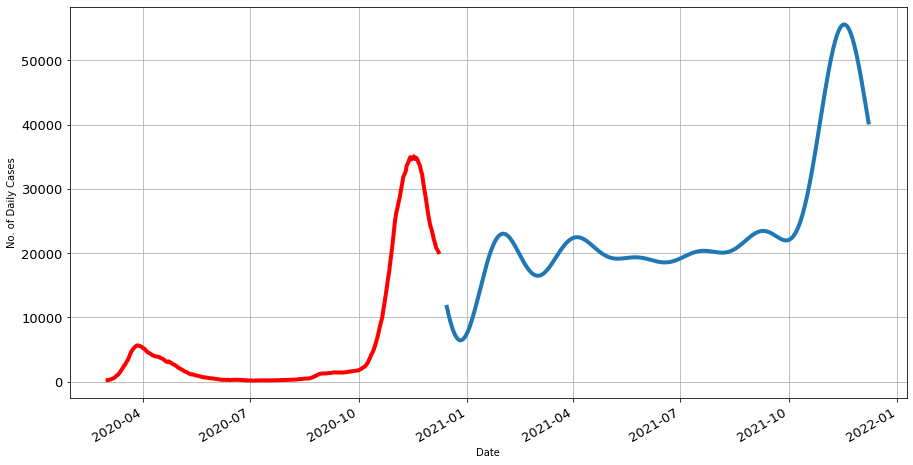

<IPython.core.display.Javascript object>

In [28]:
fig = forecast_daily_pos.plot(
    x="date",
    y="mean",
    kind="line",
    figsize=(15, 8),
    fontsize=13,
    legend=False,
)
plt.plot("ds", "mean", data=daily_positive, marker="", color="red", linewidth=4)
fig.set_ylabel("No. of Daily Cases")
fig.set_xlabel("Date")
plt.grid()
for line in fig.get_lines():
    line.set_linewidth(4)
plt.show()